In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/abhijaysingh/Documents/College/Semester 5/ML/Assignment 4/Country-data.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


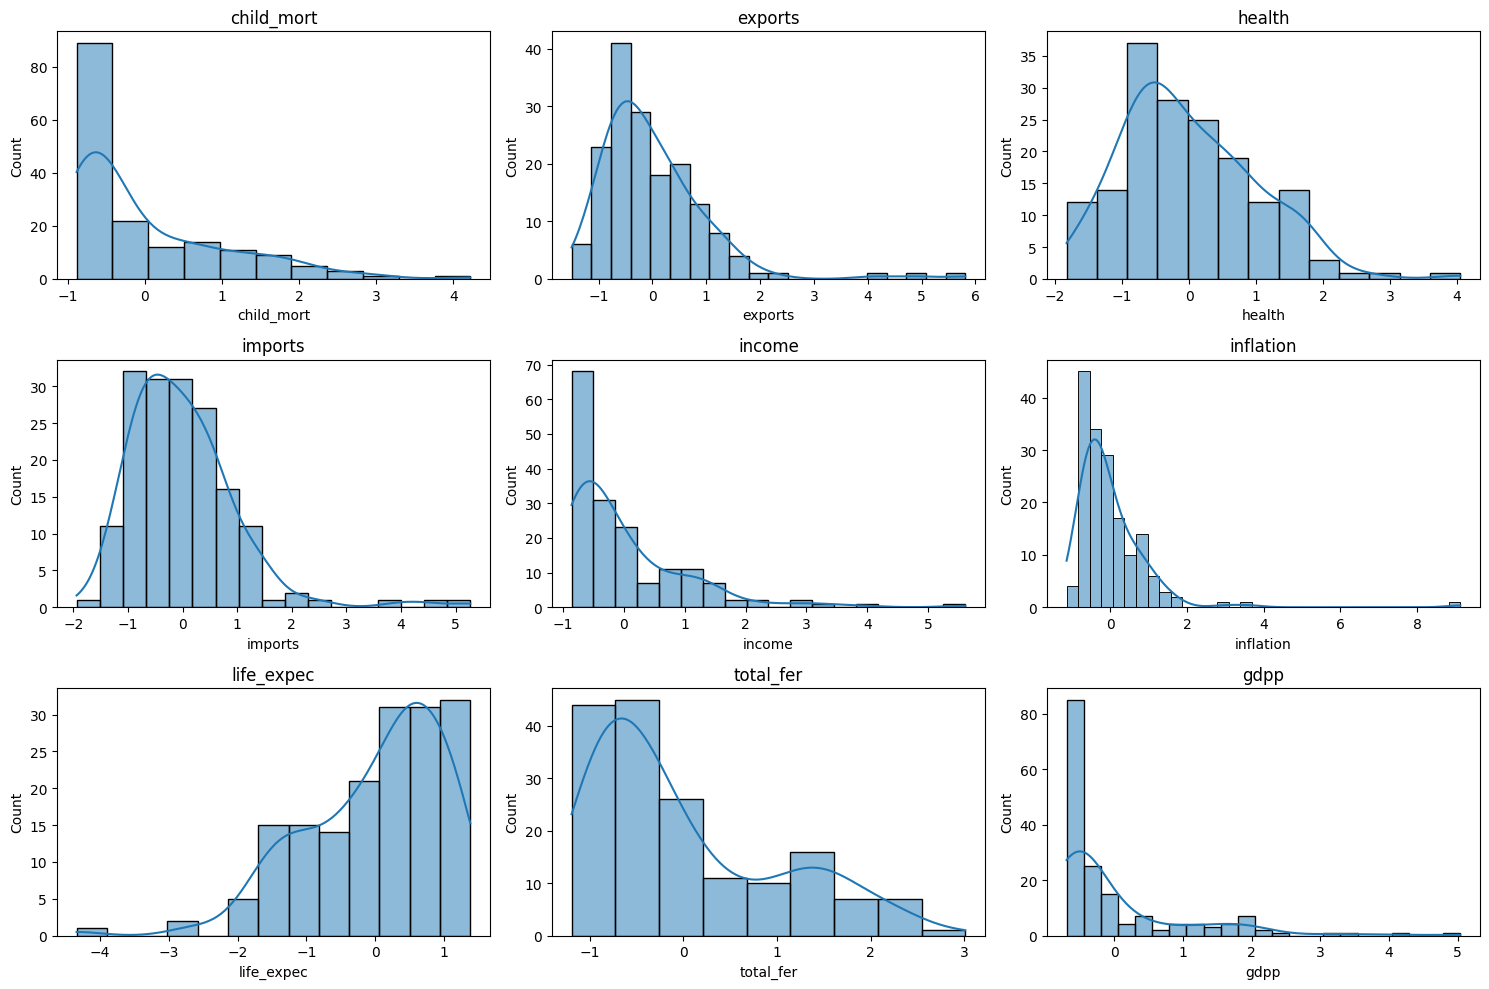

(       child_mort     exports      health     imports         income  \
 count  167.000000  167.000000  167.000000  167.000000     167.000000   
 mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
 std     40.328931   27.412010    2.746837   24.209589   19278.067698   
 min      2.600000    0.109000    1.810000    0.065900     609.000000   
 25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
 50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
 75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
 max    208.000000  200.000000   17.900000  174.000000  125000.000000   
 
         inflation  life_expec   total_fer           gdpp  
 count  167.000000  167.000000  167.000000     167.000000  
 mean     7.781832   70.555689    2.947964   12964.155689  
 std     10.570704    8.893172    1.513848   18328.704809  
 min     -4.210000   32.100000    1.150000     231.000000  
 25%      1.810000   65.300000    1.79500

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Summary statistics of the dataset
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Standardizing the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 1:])  # Exclude the 'country' column which is categorical

# Convert the scaled features back into a dataframe for further analysis
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:])

# Plotting histograms for each feature to understand the distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(scaled_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(scaled_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

summary_stats, missing_values


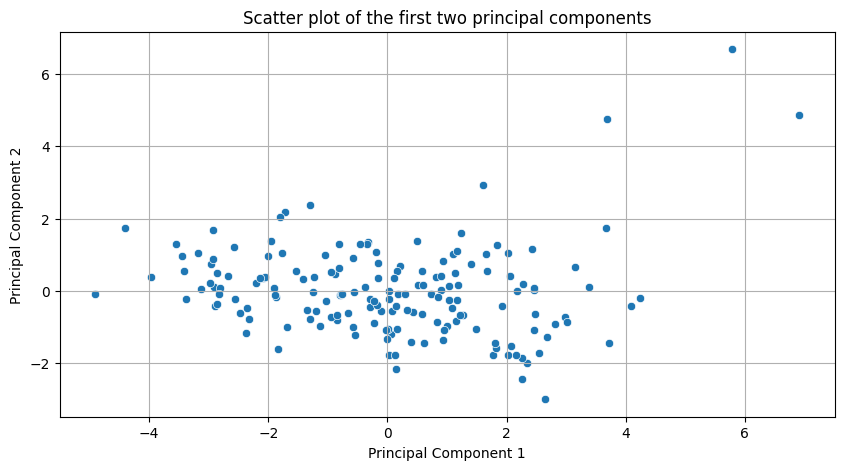

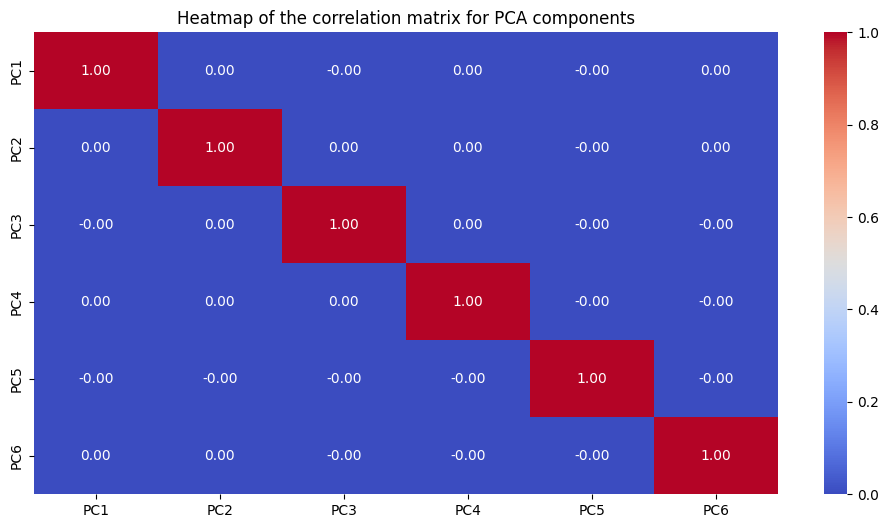

(6,
 array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
        0.97015232, 0.98275663, 0.99256944, 1.        ]),
 array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235, 0.0126043 , 0.00981282, 0.00743056]))

In [3]:
from sklearn.decomposition import PCA

# Initialize PCA and fit to the scaled data
pca = PCA()
pca.fit(scaled_df)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Identify the optimal number of principal components
# We look for the point where the cumulative explained variance is around 0.95 or 95% to retain
optimal_components = next(x for x, cumulative in enumerate(cumulative_explained_variance) if cumulative > 0.95) + 1

# Perform PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
pca_transformed = pca_optimal.fit_transform(scaled_df)

# Convert to DataFrame for visualization
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(optimal_components)])

# Scatter plot for the first two principal components
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Scatter plot of the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Heatmap for the correlation matrix of the PCA components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the correlation matrix for PCA components')
plt.show()

# Returning the optimal number of components and the explained variance
optimal_components, cumulative_explained_variance, explained_variance_ratio


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

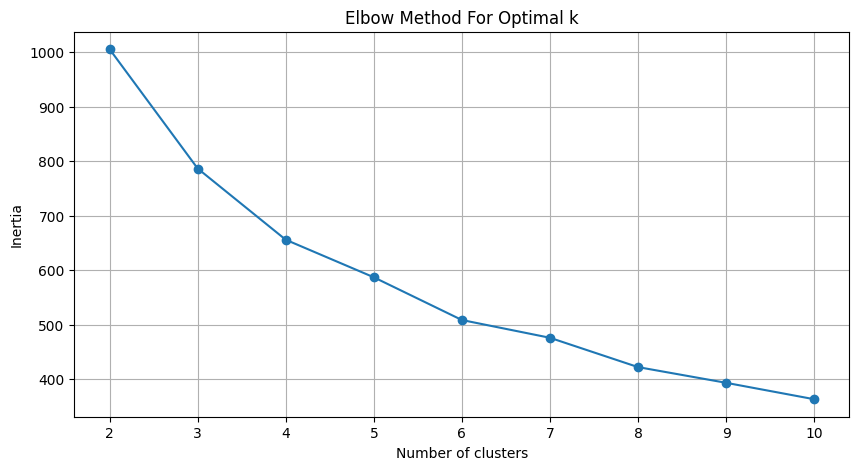

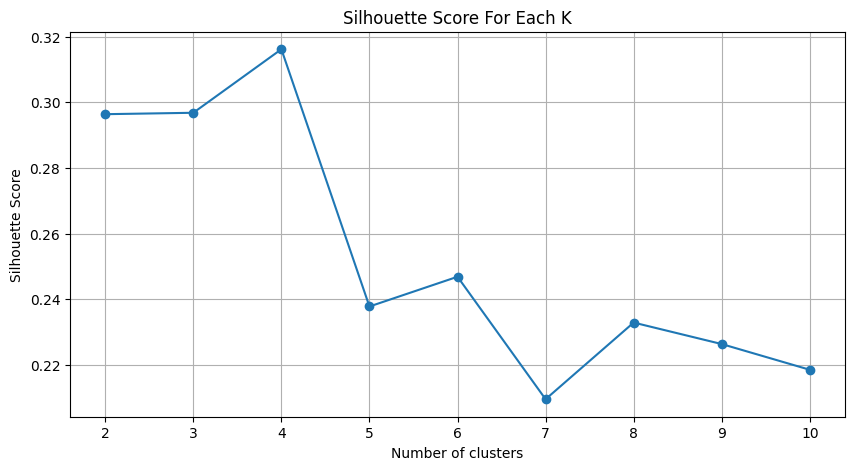

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


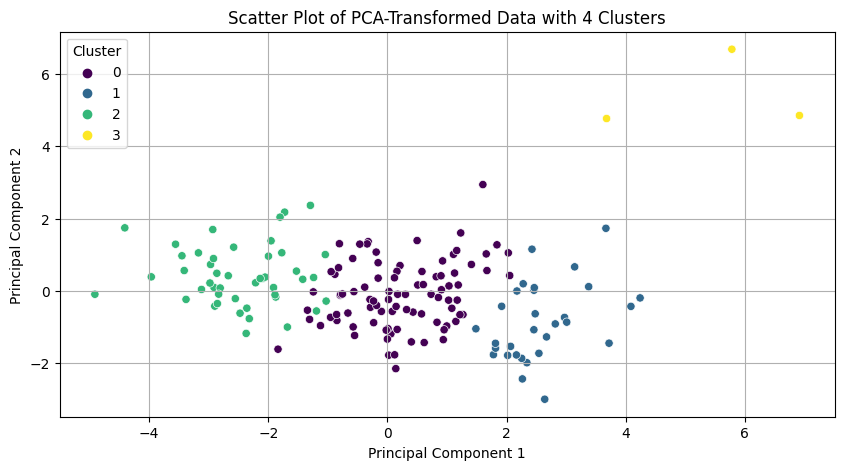

4

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of possible clusters to test with KMeans
cluster_range = range(2, 11)

# Applying the Elbow Method to find the optimal number of clusters
inertia = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Each K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters using silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Running KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(pca_df)

# Adding the cluster labels to the PCA dataframe
pca_df['Cluster'] = kmeans_optimal.labels_

# Scatter plot for the first two principal components colored by cluster
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title(f'Scatter Plot of PCA-Transformed Data with {optimal_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Returning the optimal number of clusters based on silhouette score
optimal_clusters
